Spartial Filters    

[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[  0.   4.   4. ...   0.   0.   0.]
 [  0.   4.   4. ...  -3.   0.   0.]
 [  0.   4.   4. ...  -9.  -2.   0.]
 ...
 [  0.   8.   9. ...  -7. -10.   0.]
 [  0.   9.  11. ...  -9.  -8.   0.]
 [  0.  10.  12. ... -10.  -8.   0.]]


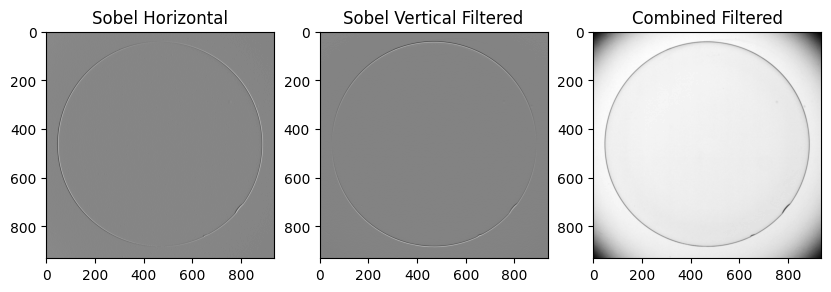

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('images/contact_lens.tif', cv.IMREAD_GRAYSCALE)
assert im is not None
sobel_h= np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
sobel_v = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], np.float32)

mod_h = cv.convertScaleAbs(sobel_h)
mod_v = cv.convertScaleAbs(sobel_v)
mod_c = cv.addWeighted(mod_h, 0.5, mod_v, 0.5, 0)
print(mod_c)

imh = cv.filter2D(im.astype('float'), -1, sobel_h)
imv = cv.filter2D(im.astype('float'), -1, sobel_v)
imc = cv.filter2D(im.astype('float'), -1, mod_c)

print(imh)
imh1 = cv.normalize(imh.astype('float'), None,0, 255.0, cv.NORM_MINMAX)
imv1 = cv.normalize(imv.astype('float'), None,0, 255.0, cv.NORM_MINMAX)
imc1 = cv.normalize(imc.astype('float'), None,0, 255.0, cv.NORM_MINMAX)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imh1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Sobel Horizontal')
ax[1].imshow(imv1, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Vertical Filtered')
ax[2].imshow(imc1, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Combined Filtered')
plt.show()

[[  0.  16.  16. ...   0.  -4.   0.]
 [  0.  16.  16. ...  -9.   4.   0.]
 [  0.  16.  16. ... -39. -10.   0.]
 ...
 [  0.  32.  35. ... -21. -42.   0.]
 [  0.  35.  45. ... -43. -28.   0.]
 [  0.  42.  48. ... -34. -36.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [ 16.  16.  16. ...   9.   0.   0.]
 [ 22.  26.  22. ...  29.   6.   0.]
 ...
 [-32. -32. -29. ...  -7.   0.  10.]
 [-32. -29. -19. ... -13. -16. -16.]
 [  0.   0.   0. ...   0.   0.   0.]]


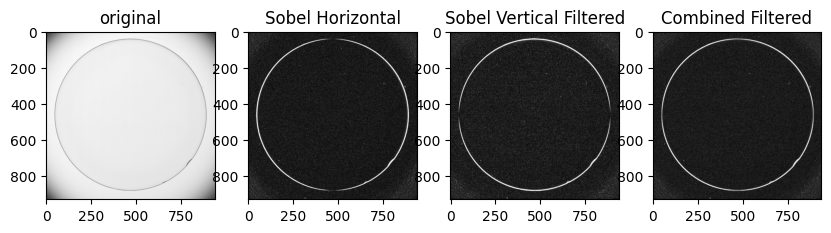

In [13]:
import cv2 as cv2
import argparse
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('images/contact_lens.tif')
assert image is not None

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


ksize = -1 
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
print(gX)
print(gY)
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)
# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
# show our output images
fig, ax= plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('original')
ax[1].imshow(gX, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Horizontal')
ax[2].imshow(gY, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Vertical Filtered')
ax[3].imshow(combined, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Combined Filtered')
plt.show()

